In [4]:
#python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def data_generator(n_samples):
    x = np.random.uniform(-10, 10, n_samples)
    y = np.cos(0.5 + np.exp(-x)) + 1/(1 + np.exp(-x)) 
    noise = np.random.normal(0, 0.01, n_samples)
    y += noise
    return x, y

complete_X , complete_Y = data_generator (5000)
train_X , train_Y = complete_X [:100] , complete_Y [:100] 
large_X , large_Y = complete_X [100:] , complete_Y [100:]
loss_func = mean_squared_error

In [56]:
# a. define a func that selects h w.r.t. given k using trainning data
def ERMS(k):
    x = np.polyfit(train_X, train_Y, deg=k, full=True)
    return x[0],x[1]

Text(0, 0.5, 'empirical risk')

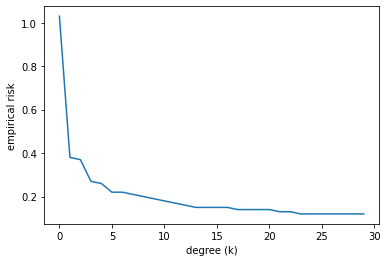

In [57]:
# b.
klist = np.arange(30)
risklist = np.arange(30)
n = 100
for k in range(30):
    poly, emr = ERMS(k)
    risklist[k] = emr[0]
risklist = risklist/n
plt.plot(klist, risklist)
plt.xlabel('degree (k)')
plt.ylabel('empirical risk')

In [58]:
# c.
# calculate Bayes risk R*
ystar = np.cos(0.5+np.exp(-large_X))+1/(1+np.exp(-large_X))
Bayesrisk = loss_func(large_Y, ystar)
print('Bayes risk R* is',Bayesrisk)

Bayes risk R* is 9.701559528260892e-05


In [59]:
# define a func that selects h w.r.t. given k using real data
def realS(k):
    x = np.polyfit(large_X, large_Y, deg=k, full=True)
    return x[0],x[1]

Text(0.5, 1.0, 'the risk of ERM for each k')

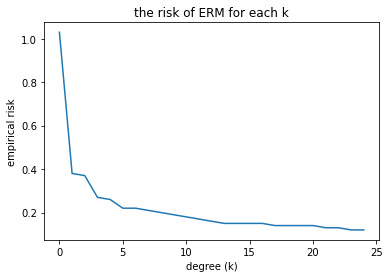

In [76]:
m = 4900
klist = np.arange(25)
emrlist = np.arange(25)
reallist = np.arange(25)
for k in range(25):
    poly1, emr = ERMS(k)
    poly2, realv = realS(k)
    emrlist[k] = emr[0]
    reallist[k] = realv[0]
emrlist = emrlist/n
reallist = reallist/m

# the plot of the risk of ERM for each k
plt.plot(klist, emrlist-Bayesrisk)
plt.xlabel('degree (k)')
plt.ylabel('empirical risk')
plt.title('the risk of ERM for each k')

Text(0.5, 1.0, 'the estimation error for each k')

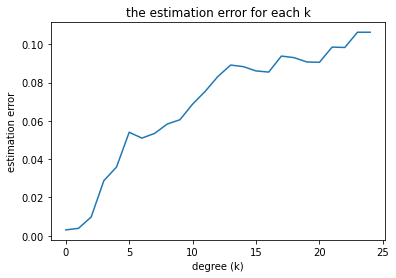

In [79]:
# the plot of the estimation error for each k
esti_error = abs(emrlist - reallist)

plt.plot(klist, esti_error)
plt.xlabel('degree (k)')
plt.ylabel('estimation error')
plt.title('the estimation error for each k')

Text(0.5, 1.0, 'the approximation error for each k')

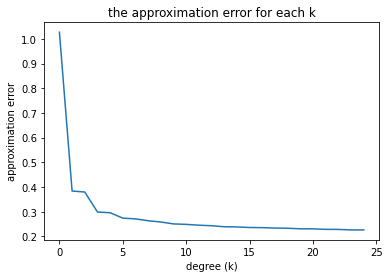

In [80]:
# the plot of the estimation error for each k
approx_error = reallist - Bayesrisk

plt.plot(klist, approx_error)
plt.xlabel('degree (k)')
plt.ylabel('approximation error')
plt.title('the approximation error for each k')